In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

2110848/2110848 [==============================] - 2s 1us/step


In [7]:
train_data.shape, test_data.shape

((8982,), (2246,))

In [10]:
train_data[1], len(train_data[1]) #lista numerow indeksow słów

([1,
  3267,
  699,
  3434,
  2295,
  56,
  2,
  7511,
  9,
  56,
  3906,
  1073,
  81,
  5,
  1198,
  57,
  366,
  737,
  132,
  20,
  4093,
  7,
  2,
  49,
  2295,
  2,
  1037,
  3267,
  699,
  3434,
  8,
  7,
  10,
  241,
  16,
  855,
  129,
  231,
  783,
  5,
  4,
  587,
  2295,
  2,
  2,
  775,
  7,
  48,
  34,
  191,
  44,
  35,
  1795,
  505,
  17,
  12],
 56)

In [11]:
test_data[1], len(test_data[1])

([1,
  2768,
  283,
  122,
  7,
  4,
  89,
  544,
  463,
  29,
  798,
  748,
  40,
  85,
  306,
  28,
  19,
  59,
  11,
  82,
  84,
  22,
  10,
  1315,
  19,
  12,
  11,
  82,
  52,
  29,
  283,
  1135,
  558,
  2,
  265,
  2,
  6607,
  8,
  6607,
  118,
  371,
  10,
  1503,
  281,
  4,
  143,
  4811,
  760,
  50,
  2088,
  225,
  139,
  683,
  4,
  48,
  193,
  862,
  41,
  967,
  1999,
  30,
  1086,
  36,
  8,
  28,
  602,
  19,
  32,
  11,
  82,
  5,
  4,
  89,
  544,
  463,
  41,
  30,
  6273,
  13,
  260,
  951,
  6607,
  8,
  69,
  1749,
  18,
  82,
  41,
  30,
  306,
  3342,
  13,
  4,
  37,
  38,
  283,
  555,
  649,
  18,
  82,
  13,
  1721,
  282,
  9,
  132,
  18,
  82,
  41,
  30,
  385,
  21,
  4,
  169,
  76,
  36,
  8,
  107,
  4,
  106,
  524,
  10,
  295,
  3825,
  2,
  2476,
  6,
  3684,
  6940,
  4,
  1126,
  41,
  263,
  84,
  395,
  649,
  18,
  82,
  838,
  1317,
  4,
  572,
  4,
  106,
  13,
  25,
  595,
  2445,
  40,
  85,
  7369,
  518,
  5,
  4,
  1126,
  51,


In [12]:
train_labels.min(), train_labels.max() # 46 roznych tematow 

(0, 45)

In [18]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [19]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [20]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [21]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = train_labels[:1000]
partial_y_train = train_labels[1000:]

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(10000,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(46, activation='softmax')
])

model.compile(loss='SparseCategoricalCrossentropy', optimizer=tf.keras.optimizers.RMSprop(), metrics='accuracy')

history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 55ms/step - loss: 2.6187 - accuracy: 0.5220 - val_loss: 1.7282 - val_accuracy: 0.6460
Epoch 2/20
16/16 [==============================] - 1s 50ms/step - loss: 1.4068 - accuracy: 0.7057 - val_loss: 1.2909 - val_accuracy: 0.7200
Epoch 3/20
16/16 [==============================] - 1s 39ms/step - loss: 1.0409 - accuracy: 0.7800 - val_loss: 1.1445 - val_accuracy: 0.7470
Epoch 4/20
16/16 [==============================] - 0s 30ms/step - loss: 0.8137 - accuracy: 0.8254 - val_loss: 1.0365 - val_accuracy: 0.7720
Epoch 5/20
16/16 [==============================] - 1s 35ms/step - loss: 0.6483 - accuracy: 0.8643 - val_loss: 0.9929 - val_accuracy: 0.7880
Epoch 6/20
16/16 [==============================] - 1s 41ms/step - loss: 0.5149 - accuracy: 0.8904 - val_loss: 0.9318 - val_accuracy: 0.8000
Epoch 7/20
16/16 [==============================] - 1s 41ms/step - loss: 0.4170 - accuracy: 0.9104 - val_loss: 0.9077 - val_accuracy: 0.8090
Epoch 8/20
16

<AxesSubplot:>

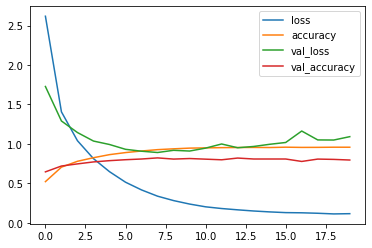

In [24]:
pd.DataFrame(history.history).plot() #przeuczenie po 9 epoce

In [27]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(10000,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(46, activation='softmax')
])

model2.compile(loss='SparseCategoricalCrossentropy', optimizer=tf.keras.optimizers.RMSprop(), metrics='accuracy')

history2 = model2.fit(partial_x_train, partial_y_train, epochs = 8, batch_size = 512, validation_data = (x_val, y_val))

Epoch 1/8
16/16 [==============================] - 1s 41ms/step - loss: 2.5775 - accuracy: 0.5259 - val_loss: 1.6937 - val_accuracy: 0.6450
Epoch 2/8
16/16 [==============================] - 1s 34ms/step - loss: 1.4085 - accuracy: 0.6954 - val_loss: 1.3341 - val_accuracy: 0.7120
Epoch 3/8
16/16 [==============================] - 1s 34ms/step - loss: 1.0637 - accuracy: 0.7681 - val_loss: 1.1510 - val_accuracy: 0.7480
Epoch 4/8
16/16 [==============================] - 1s 31ms/step - loss: 0.8373 - accuracy: 0.8212 - val_loss: 1.0513 - val_accuracy: 0.7640
Epoch 5/8
16/16 [==============================] - 0s 28ms/step - loss: 0.6643 - accuracy: 0.8581 - val_loss: 0.9898 - val_accuracy: 0.7900
Epoch 6/8
16/16 [==============================] - 0s 28ms/step - loss: 0.5286 - accuracy: 0.8861 - val_loss: 0.9223 - val_accuracy: 0.8150
Epoch 7/8
16/16 [==============================] - 0s 28ms/step - loss: 0.4184 - accuracy: 0.9128 - val_loss: 0.9397 - val_accuracy: 0.8040
Epoch 8/8
16/16 [===

<AxesSubplot:>

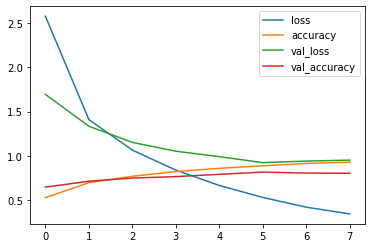

In [28]:
pd.DataFrame(history2.history).plot()

In [30]:
model2.evaluate(x_test, test_labels)

71/71 [==============================] - 0s 3ms/step - loss: 1.0063 - accuracy: 0.7792


[1.006306767463684, 0.7791629433631897]

In [36]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(10000,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(46, activation='softmax')
])

model3.compile(loss='SparseCategoricalCrossentropy', optimizer=tf.keras.optimizers.RMSprop(), metrics='accuracy')

model3.fit(partial_x_train, partial_y_train, epochs = 6, batch_size = 512, validation_data = (x_val, y_val))

Epoch 1/6
16/16 [==============================] - 2s 56ms/step - loss: 2.2626 - accuracy: 0.5443 - val_loss: 1.4638 - val_accuracy: 0.6790
Epoch 2/6
16/16 [==============================] - 1s 42ms/step - loss: 1.1961 - accuracy: 0.7321 - val_loss: 1.2243 - val_accuracy: 0.7180
Epoch 3/6
16/16 [==============================] - 1s 41ms/step - loss: 0.8637 - accuracy: 0.8007 - val_loss: 1.0283 - val_accuracy: 0.7670
Epoch 4/6
16/16 [==============================] - 1s 46ms/step - loss: 0.6284 - accuracy: 0.8564 - val_loss: 0.9620 - val_accuracy: 0.7960
Epoch 5/6
16/16 [==============================] - 1s 54ms/step - loss: 0.4578 - accuracy: 0.8933 - val_loss: 0.9255 - val_accuracy: 0.8220
Epoch 6/6
16/16 [==============================] - 1s 44ms/step - loss: 0.3414 - accuracy: 0.9240 - val_loss: 1.0962 - val_accuracy: 0.7730


In [37]:
model3.evaluate(x_test, test_labels)

71/71 [==============================] - 0s 5ms/step - loss: 1.1964 - accuracy: 0.7422


[1.1964004039764404, 0.7422083616256714]

In [43]:
model4 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='tanh', input_shape=(10000,)),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(46, activation='softmax')
])

model4.compile(loss='SparseCategoricalCrossentropy', optimizer=tf.keras.optimizers.RMSprop(learning_rate = 0.0001), metrics='accuracy')

model4.fit(partial_x_train, partial_y_train, epochs = 36, batch_size = 512, validation_data = (x_val, y_val))

Epoch 1/36
16/16 [==============================] - 1s 53ms/step - loss: 3.3427 - accuracy: 0.4313 - val_loss: 2.9195 - val_accuracy: 0.5310
Epoch 2/36
16/16 [==============================] - 1s 40ms/step - loss: 2.6535 - accuracy: 0.5271 - val_loss: 2.4009 - val_accuracy: 0.5400
Epoch 3/36
16/16 [==============================] - 1s 45ms/step - loss: 2.2073 - accuracy: 0.5423 - val_loss: 2.0576 - val_accuracy: 0.5460
Epoch 4/36
16/16 [==============================] - 1s 45ms/step - loss: 1.9035 - accuracy: 0.5750 - val_loss: 1.8219 - val_accuracy: 0.5770
Epoch 5/36
16/16 [==============================] - 1s 44ms/step - loss: 1.6867 - accuracy: 0.6150 - val_loss: 1.6540 - val_accuracy: 0.6130
Epoch 6/36
16/16 [==============================] - 1s 45ms/step - loss: 1.5226 - accuracy: 0.6543 - val_loss: 1.5258 - val_accuracy: 0.6340
Epoch 7/36
16/16 [==============================] - 1s 42ms/step - loss: 1.3911 - accuracy: 0.6913 - val_loss: 1.4258 - val_accuracy: 0.6620
Epoch 8/36
16

In [44]:
model4.evaluate(x_test, test_labels)

71/71 [==============================] - 0s 5ms/step - loss: 1.0100 - accuracy: 0.7841


[1.0099738836288452, 0.784060537815094]

In [46]:
model5 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='tanh', input_shape=(10000,)),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(46, activation='softmax')
])

model5.compile(loss='SparseCategoricalCrossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics='accuracy')

model5.fit(partial_x_train, partial_y_train, epochs = 50, batch_size = 512, validation_data = (x_val, y_val))

Epoch 1/50
16/16 [==============================] - 1s 50ms/step - loss: 3.6300 - accuracy: 0.2711 - val_loss: 3.3614 - val_accuracy: 0.5160
Epoch 2/50
16/16 [==============================] - 1s 42ms/step - loss: 3.1024 - accuracy: 0.5167 - val_loss: 2.8379 - val_accuracy: 0.5210
Epoch 3/50
16/16 [==============================] - 1s 34ms/step - loss: 2.5837 - accuracy: 0.5272 - val_loss: 2.3613 - val_accuracy: 0.5370
Epoch 4/50
16/16 [==============================] - 0s 31ms/step - loss: 2.1520 - accuracy: 0.5590 - val_loss: 2.0120 - val_accuracy: 0.5740
Epoch 5/50
16/16 [==============================] - 0s 31ms/step - loss: 1.8494 - accuracy: 0.6114 - val_loss: 1.7843 - val_accuracy: 0.6120
Epoch 6/50
16/16 [==============================] - 1s 36ms/step - loss: 1.6504 - accuracy: 0.6453 - val_loss: 1.6339 - val_accuracy: 0.6300
Epoch 7/50
16/16 [==============================] - 1s 33ms/step - loss: 1.5081 - accuracy: 0.6708 - val_loss: 1.5248 - val_accuracy: 0.6460
Epoch 8/50
16

In [47]:
model5.evaluate(x_test, test_labels)

71/71 [==============================] - 0s 3ms/step - loss: 0.9611 - accuracy: 0.7885


[0.9610717296600342, 0.7885128855705261]

In [48]:
model6 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(10000,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(46, activation='softmax')
])

model6.compile(loss='SparseCategoricalCrossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics='accuracy')

model6.fit(partial_x_train, partial_y_train, epochs = 50, batch_size = 512, validation_data = (x_val, y_val))

Epoch 1/50
16/16 [==============================] - 1s 43ms/step - loss: 3.7779 - accuracy: 0.1267 - val_loss: 3.7154 - val_accuracy: 0.3690
Epoch 2/50
16/16 [==============================] - 1s 32ms/step - loss: 3.6398 - accuracy: 0.4412 - val_loss: 3.5289 - val_accuracy: 0.4650
Epoch 3/50
16/16 [==============================] - 1s 35ms/step - loss: 3.3892 - accuracy: 0.4803 - val_loss: 3.2059 - val_accuracy: 0.4960
Epoch 4/50
16/16 [==============================] - 1s 34ms/step - loss: 3.0150 - accuracy: 0.5063 - val_loss: 2.8079 - val_accuracy: 0.5170
Epoch 5/50
16/16 [==============================] - 1s 42ms/step - loss: 2.5992 - accuracy: 0.5289 - val_loss: 2.4068 - val_accuracy: 0.5300
Epoch 6/50
16/16 [==============================] - 1s 32ms/step - loss: 2.2009 - accuracy: 0.5454 - val_loss: 2.0594 - val_accuracy: 0.5540
Epoch 7/50
16/16 [==============================] - 0s 31ms/step - loss: 1.8872 - accuracy: 0.5933 - val_loss: 1.8220 - val_accuracy: 0.5930
Epoch 8/50
16

In [49]:
model6.evaluate(x_test, test_labels)

71/71 [==============================] - 0s 4ms/step - loss: 1.0853 - accuracy: 0.7876


[1.0853354930877686, 0.7876224517822266]

In [56]:
model7 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='tanh', input_shape=(10000,)),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(46, activation='softmax')
])

model7.compile(loss='SparseCategoricalCrossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), metrics='accuracy')

model7.fit(partial_x_train, partial_y_train, epochs = 6, batch_size = 512, validation_data = (x_val, y_val))

Epoch 1/6
16/16 [==============================] - 1s 45ms/step - loss: 2.2957 - accuracy: 0.5029 - val_loss: 1.5099 - val_accuracy: 0.6480
Epoch 2/6
16/16 [==============================] - 1s 32ms/step - loss: 1.2372 - accuracy: 0.7185 - val_loss: 1.1239 - val_accuracy: 0.7380
Epoch 3/6
16/16 [==============================] - 1s 34ms/step - loss: 0.8312 - accuracy: 0.8210 - val_loss: 0.9458 - val_accuracy: 0.7980
Epoch 4/6
16/16 [==============================] - 1s 32ms/step - loss: 0.5510 - accuracy: 0.8911 - val_loss: 0.8577 - val_accuracy: 0.8090
Epoch 5/6
16/16 [==============================] - 1s 34ms/step - loss: 0.3665 - accuracy: 0.9302 - val_loss: 0.8299 - val_accuracy: 0.8180
Epoch 6/6
16/16 [==============================] - 1s 34ms/step - loss: 0.2542 - accuracy: 0.9459 - val_loss: 0.8264 - val_accuracy: 0.8250


In [57]:
model7.evaluate(x_test, test_labels)

71/71 [==============================] - 0s 3ms/step - loss: 0.9205 - accuracy: 0.7983


[0.9204806089401245, 0.7983080744743347]

In [66]:
model8 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='tanh', input_shape=(10000,)),
    tf.keras.layers.Dense(256, activation='tanh'),
    tf.keras.layers.Dense(46, activation='softmax')
])

model8.compile(loss='SparseCategoricalCrossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics='accuracy')

model8.fit(partial_x_train, partial_y_train, epochs = 33, batch_size = 512, validation_data = (x_val, y_val))

Epoch 1/33
16/16 [==============================] - 2s 71ms/step - loss: 3.4914 - accuracy: 0.3826 - val_loss: 3.0761 - val_accuracy: 0.5300
Epoch 2/33
16/16 [==============================] - 1s 55ms/step - loss: 2.7420 - accuracy: 0.5363 - val_loss: 2.4197 - val_accuracy: 0.5430
Epoch 3/33
16/16 [==============================] - 1s 54ms/step - loss: 2.1515 - accuracy: 0.5728 - val_loss: 1.9722 - val_accuracy: 0.5810
Epoch 4/33
16/16 [==============================] - 1s 48ms/step - loss: 1.7774 - accuracy: 0.6320 - val_loss: 1.7187 - val_accuracy: 0.6200
Epoch 5/33
16/16 [==============================] - 1s 47ms/step - loss: 1.5534 - accuracy: 0.6670 - val_loss: 1.5581 - val_accuracy: 0.6440
Epoch 6/33
16/16 [==============================] - 1s 49ms/step - loss: 1.3967 - accuracy: 0.6982 - val_loss: 1.4426 - val_accuracy: 0.6660
Epoch 7/33
16/16 [==============================] - 1s 52ms/step - loss: 1.2725 - accuracy: 0.7260 - val_loss: 1.3530 - val_accuracy: 0.6810
Epoch 8/33
16

In [67]:
model8.evaluate(x_test, test_labels)

71/71 [==============================] - 0s 6ms/step - loss: 0.9067 - accuracy: 0.7921


[0.9067441821098328, 0.7920747995376587]

In [72]:
model9 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='tanh', input_shape=(10000,)),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(46, activation='softmax')
])

model9.compile(loss='SparseCategoricalCrossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics='accuracy')

model9.fit(partial_x_train, partial_y_train, epochs = 57, batch_size = 512, validation_data = (x_val, y_val))

Epoch 1/57
16/16 [==============================] - 1s 43ms/step - loss: 3.5708 - accuracy: 0.2945 - val_loss: 3.3069 - val_accuracy: 0.4690
Epoch 2/57
16/16 [==============================] - 1s 33ms/step - loss: 3.1044 - accuracy: 0.4620 - val_loss: 2.8905 - val_accuracy: 0.4900
Epoch 3/57
16/16 [==============================] - 1s 33ms/step - loss: 2.6997 - accuracy: 0.4950 - val_loss: 2.5314 - val_accuracy: 0.5340
Epoch 4/57
16/16 [==============================] - 0s 31ms/step - loss: 2.3523 - accuracy: 0.5457 - val_loss: 2.2345 - val_accuracy: 0.5600
Epoch 5/57
16/16 [==============================] - 1s 32ms/step - loss: 2.0711 - accuracy: 0.5811 - val_loss: 2.0018 - val_accuracy: 0.5790
Epoch 6/57
16/16 [==============================] - 1s 35ms/step - loss: 1.8531 - accuracy: 0.6159 - val_loss: 1.8292 - val_accuracy: 0.6030
Epoch 7/57
16/16 [==============================] - 1s 34ms/step - loss: 1.6901 - accuracy: 0.6437 - val_loss: 1.7000 - val_accuracy: 0.6260
Epoch 8/57
16

In [73]:
model9.evaluate(x_test, test_labels)

71/71 [==============================] - 0s 4ms/step - loss: 0.9094 - accuracy: 0.7903


[0.9093919992446899, 0.7902938723564148]

In [110]:
model10 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='tanh', input_shape=(10000,)),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(46, activation='softmax')
])

model10.compile(loss='SparseCategoricalCrossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics='accuracy')

model10.fit(partial_x_train, partial_y_train, epochs = 100, batch_size = 512, validation_data = (x_val, y_val))

Epoch 1/100
16/16 [==============================] - 1s 26ms/step - loss: 3.6842 - accuracy: 0.2461 - val_loss: 3.4918 - val_accuracy: 0.4560
Epoch 2/100
16/16 [==============================] - 0s 20ms/step - loss: 3.3510 - accuracy: 0.4892 - val_loss: 3.1970 - val_accuracy: 0.5080
Epoch 3/100
16/16 [==============================] - 0s 20ms/step - loss: 3.0672 - accuracy: 0.5174 - val_loss: 2.9368 - val_accuracy: 0.5200
Epoch 4/100
16/16 [==============================] - 0s 19ms/step - loss: 2.8131 - accuracy: 0.5284 - val_loss: 2.7047 - val_accuracy: 0.5300
Epoch 5/100
16/16 [==============================] - 0s 21ms/step - loss: 2.5855 - accuracy: 0.5445 - val_loss: 2.4994 - val_accuracy: 0.5440
Epoch 6/100
16/16 [==============================] - 0s 19ms/step - loss: 2.3852 - accuracy: 0.5621 - val_loss: 2.3222 - val_accuracy: 0.5580
Epoch 7/100
16/16 [==============================] - 0s 18ms/step - loss: 2.2124 - accuracy: 0.5846 - val_loss: 2.1720 - val_accuracy: 0.5690
Epoch 

16/16 [==============================] - 0s 19ms/step - loss: 0.4508 - accuracy: 0.9231 - val_loss: 0.8891 - val_accuracy: 0.8170
Epoch 59/100
16/16 [==============================] - 0s 18ms/step - loss: 0.4406 - accuracy: 0.9251 - val_loss: 0.8851 - val_accuracy: 0.8190
Epoch 60/100
16/16 [==============================] - 0s 17ms/step - loss: 0.4304 - accuracy: 0.9271 - val_loss: 0.8813 - val_accuracy: 0.8190
Epoch 61/100
16/16 [==============================] - 0s 17ms/step - loss: 0.4206 - accuracy: 0.9295 - val_loss: 0.8781 - val_accuracy: 0.8180
Epoch 62/100
16/16 [==============================] - 0s 18ms/step - loss: 0.4110 - accuracy: 0.9311 - val_loss: 0.8747 - val_accuracy: 0.8190
Epoch 63/100
16/16 [==============================] - 0s 18ms/step - loss: 0.4020 - accuracy: 0.9322 - val_loss: 0.8713 - val_accuracy: 0.8180
Epoch 64/100
16/16 [==============================] - 0s 19ms/step - loss: 0.3929 - accuracy: 0.9345 - val_loss: 0.8688 - val_accuracy: 0.8190
Epoch 65/100

In [111]:
model10.evaluate(x_test, test_labels)

71/71 [==============================] - 0s 2ms/step - loss: 0.9191 - accuracy: 0.7885


[0.9191417098045349, 0.7885128855705261]

In [112]:
#experimental model

model_exp = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='softsign', input_shape=(10000,)),
    tf.keras.layers.Dense(128, activation='softsign'),
    tf.keras.layers.Dense(46, activation='softmax')
])

model_exp.compile(loss='SparseCategoricalCrossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate = 0.05), metrics='accuracy')

model_exp.fit(partial_x_train, partial_y_train, epochs = 150, batch_size = 512, validation_data = (x_val, y_val))

Epoch 1/150
16/16 [==============================] - 1s 30ms/step - loss: 3.1723 - accuracy: 0.3270 - val_loss: 2.6352 - val_accuracy: 0.3560
Epoch 2/150
16/16 [==============================] - 0s 22ms/step - loss: 2.4389 - accuracy: 0.4126 - val_loss: 2.2490 - val_accuracy: 0.4880
Epoch 3/150
16/16 [==============================] - 0s 22ms/step - loss: 2.1684 - accuracy: 0.5113 - val_loss: 2.0645 - val_accuracy: 0.5220
Epoch 4/150
16/16 [==============================] - 0s 24ms/step - loss: 2.0162 - accuracy: 0.5185 - val_loss: 1.9468 - val_accuracy: 0.5260
Epoch 5/150
16/16 [==============================] - 0s 24ms/step - loss: 1.9114 - accuracy: 0.5318 - val_loss: 1.8605 - val_accuracy: 0.5420
Epoch 6/150
16/16 [==============================] - 0s 22ms/step - loss: 1.8300 - accuracy: 0.5536 - val_loss: 1.7902 - val_accuracy: 0.5600
Epoch 7/150
16/16 [==============================] - 0s 21ms/step - loss: 1.7640 - accuracy: 0.5748 - val_loss: 1.7316 - val_accuracy: 0.5760
Epoch 

16/16 [==============================] - 0s 24ms/step - loss: 0.8634 - accuracy: 0.8163 - val_loss: 1.0555 - val_accuracy: 0.7720
Epoch 59/150
16/16 [==============================] - 0s 24ms/step - loss: 0.8545 - accuracy: 0.8186 - val_loss: 1.0494 - val_accuracy: 0.7730
Epoch 60/150
16/16 [==============================] - 0s 22ms/step - loss: 0.8461 - accuracy: 0.8203 - val_loss: 1.0463 - val_accuracy: 0.7730
Epoch 61/150
16/16 [==============================] - 0s 22ms/step - loss: 0.8375 - accuracy: 0.8221 - val_loss: 1.0427 - val_accuracy: 0.7740
Epoch 62/150
16/16 [==============================] - 0s 21ms/step - loss: 0.8291 - accuracy: 0.8241 - val_loss: 1.0396 - val_accuracy: 0.7730
Epoch 63/150
16/16 [==============================] - 0s 22ms/step - loss: 0.8208 - accuracy: 0.8254 - val_loss: 1.0360 - val_accuracy: 0.7730
Epoch 64/150
16/16 [==============================] - 0s 24ms/step - loss: 0.8128 - accuracy: 0.8270 - val_loss: 1.0315 - val_accuracy: 0.7720
Epoch 65/150

16/16 [==============================] - 0s 23ms/step - loss: 0.5005 - accuracy: 0.8913 - val_loss: 0.9288 - val_accuracy: 0.7980
Epoch 116/150
16/16 [==============================] - 0s 22ms/step - loss: 0.4960 - accuracy: 0.8936 - val_loss: 0.9274 - val_accuracy: 0.7980
Epoch 117/150
16/16 [==============================] - 0s 22ms/step - loss: 0.4917 - accuracy: 0.8934 - val_loss: 0.9296 - val_accuracy: 0.8000
Epoch 118/150
16/16 [==============================] - 0s 24ms/step - loss: 0.4875 - accuracy: 0.8940 - val_loss: 0.9275 - val_accuracy: 0.7990
Epoch 119/150
16/16 [==============================] - 0s 23ms/step - loss: 0.4831 - accuracy: 0.8955 - val_loss: 0.9246 - val_accuracy: 0.8000
Epoch 120/150
16/16 [==============================] - 0s 22ms/step - loss: 0.4789 - accuracy: 0.8968 - val_loss: 0.9233 - val_accuracy: 0.8020
Epoch 121/150
16/16 [==============================] - 0s 22ms/step - loss: 0.4748 - accuracy: 0.8978 - val_loss: 0.9225 - val_accuracy: 0.8010
Epoch 

In [113]:
model_exp.evaluate(x_test, test_labels)

71/71 [==============================] - 0s 2ms/step - loss: 0.9934 - accuracy: 0.7747


[0.9933626651763916, 0.7747105956077576]